<a href="https://colab.research.google.com/github/rakanakmaltge/Project_LinearModel/blob/main/Project__Linear_Model_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Molin Project 1 Kelompok 5
- Aurelio Naufal Effendy (2106638526)
- Rifa Nayaka Utami (2106632163)
- Muhamad Rakan Akmal (2106635745)
- Musarrofah Kurnia (2106652543)
- Shafiyah Audiva Yasmin (2106706880)


Data yang digunakan adalah Real Estate Price Prediction,

sumber: https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction?datasetId=88705&sortBy=voteCount

Tujuannya adalah untuk memprediksi harga real estate dengan menerapkan model regresi linier.

# Load Data

Import modules yang akan dibutuhkan

In [ ]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load data dari Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading data
df = pd.read_csv('/content/drive/MyDrive/Molin Project 1 Kel 5/Real estate.csv')

In [ ]:
# atau langsung mengimport dari data yang telah diupload ke gcollab
data_csv = 'Real estate.csv'
df = pd.read_csv(data_csv)

FileNotFoundError: ignored

In [ ]:
# melihat isi data

print("Tipe Data:", type(df))

print("\nKeterangan Dataset")
print(df.info())

print("\nHead Dataset")
df.head()

Tipe Data: <class 'pandas.core.frame.DataFrame'>

Keterangan Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB
None
No                                        0
X1 transaction date                  

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


Dapat dilihat, datanya lengkap, tidak ada missing values.

Didapatkan juga dari data terdapat 414 subjek dengan 8 variabel, yakni =
1. Nomor rumah (tipe data : integer)
2. X1 tanggal transaksi (tipe data : float)
3. X2 umur rumah (tipe data : float)
4. X3 jarak ke stasiun MRT terdekat (tipe data : float)
5. X4 banyak toko serbaada (tipe data : integer)
6. X5 lintang (tipe data : float)                          
7. X6 bujur (tipe data : float)                           
8. Y Harga rumah dari unit area tersebut (tipe data : float)       



# Prepocessing

Data Cleaning (Supaya memudahkan dalam pemodelan)

In [ ]:
# Variabel yang tidak berguna dalam pemodelan regresi linear akan didrop yakni variabel Nomor rumah, latitude, longitude (karena merupakan bujur dan lintang lokasi rumahnya)
# variabel latitude dan longitude juga memiliki nilai yang hampir sama pada semua data, serta tidak terlalu berpengaruh terhadap variabel harga rumah (karena menunjukan lokasi rumahnya)
df = df.drop(['No','X5 latitude','X6 longitude'],axis=1)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1


In [ ]:
# Supaya lebih mudah, nama variabel akan diganti
df = df.rename(columns = {"X1 transaction date":"transaction_date",
                         "X2 house age": "house_age",
                         "X3 distance to the nearest MRT station": "distance_MRT_station",
                         "X4 number of convenience stores":"number_conv_stores",
                         "Y house price of unit area":"houseprice_unit_area" })
df.head()

,transaction_date,house_age,distance_MRT_station,number_conv_stores,houseprice_unit_area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1


In [ ]:
df.to_csv('data_realestate.csv', index=False) # mensave data yang akan dimasukkan/digunakan untuk membuat model

In [ ]:
# Selanjutnya untuk mendapatkan insight serta visualisasi data yang lebih baik akan dilanjutkan preprocessing dan eksplorasi data analisis (EDA)

# Akan diambil info berguna dari kolom "transaction date", seperti Tahun, Kuartal.
# Kolom tanggal transaksi memiliki 2 bagian, yakni Tahun.Kode Bulan
# Setiap bulan sama dengan 83,33 unit tambahan dari bulan sebelumnya.
# Misalnya jika 2013.250 berarti -> Tahun adalah 2013 dan bulannya adalah 250/83,33 (yaitu bulan ke-3)

# Akan dicari list [tahun,kode_bulan].
year_mon = df['transaction_date'].apply(lambda x:str(x).split("."))  #typecasting setiap nilai ke string dan mensplliting(pisahkan) menjadi tahun dan bulan
years = [int(year[0]) for year in year_mon] #tahun
months = [int(year[1]) for year in year_mon] #bulan

# Membuat kolom baru untuk tahun dan bulan
df['transaction_year'] = years
df['transaction_month'] = months

#Beberapa nilai dalam daftar bulan misalnya: 500 akan diformat otomatis menjadi 5. Angka nol yang dibelakangnya dihapus, sehingga perlu disesuaikan
df['transaction_month'] = df['transaction_month'].apply(lambda x:x*100 if x<10 else x)
df['transaction_month'] = df['transaction_month'].apply(lambda x:x*10 if x<100 else x)

# Bulanya akan dibagi menjadi 4 kuarter
# (83.3 x 12 bulan = 999.6)
# Sehingga akan dibuat fungsi untuk mengonversi kode bulan ke Quarter. Misalnya: (0-250->Januari-Maret->Q1, 251-500->April-Juni->Q2, dst..)
def quarter_conv(month):
    if month <= 250:
        return "Q1"
    elif month <= 500:
        return "Q2"
    elif month <= 750:
        return "Q3"
    elif month <= 1000:
        return "Q4"

df['transaction_qtr'] = df['transaction_month'].apply(quarter_conv) #Panggil fungsi tersebut

qtrs = df['transaction_qtr'] #variabel quarter telah dibuat yang akan berguna untuk mencari insight nanti

In [ ]:
df.head()

,transaction_date,house_age,distance_MRT_station,number_conv_stores,houseprice_unit_area,transaction_year,transaction_month,transaction_qtr
0,2012.917,32.0,84.87882,10,37.9,2012,917,Q4
1,2012.917,19.5,306.59470,9,42.2,2012,917,Q4
2,2013.583,13.3,561.98450,5,47.3,2013,583,Q3
3,2013.500,13.3,561.98450,5,54.8,2013,500,Q2
4,2012.833,5.0,390.56840,5,43.1,2012,833,Q4


In [ ]:
# Sehingga variabel transaction_date dan transaction_month dapat dihapus
df = df.drop(['transaction_date', "transaction_month"],axis=1)
df.head()

,house_age,distance_MRT_station,number_conv_stores,houseprice_unit_area,transaction_year,transaction_qtr
0,32.0,84.87882,10,37.9,2012,Q4
1,19.5,306.59470,9,42.2,2012,Q4
2,13.3,561.98450,5,47.3,2013,Q3
3,13.3,561.98450,5,54.8,2013,Q2
4,5.0,390.56840,5,43.1,2012,Q4


In [ ]:
df.dtypes #lihat tipe data

house_age               float64
distance_MRT_station    float64
number_conv_stores        int64
houseprice_unit_area    float64
transaction_year          int64
transaction_qtr          object
dtype: object

In [ ]:
# ubah tipe data object ke kategori
df['transaction_qtr'] = df['transaction_qtr'].astype('category')
print(df.dtypes) #mengecek apakah sudah benar termasuk data kategori
df['transaction_qtr'].value_counts() # melihat berapa banyak data yang berada di Q1,Q2,Q3,Q4 dari variabel transaction_qtr

house_age                float64
distance_MRT_station     float64
number_conv_stores         int64
houseprice_unit_area     float64
transaction_year           int64
transaction_qtr         category
dtype: object


Q2    134
Q4    115
Q1     85
Q3     80
Name: transaction_qtr, dtype: int64

In [ ]:
df.describe(include='all') #untuk mengecek statistika deskriptifnya

,house_age,distance_MRT_station,number_conv_stores,houseprice_unit_area,transaction_year,transaction_qtr
count,414.000000,414.000000,414.000000,414.000000,414.000000,414
unique,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,Q2
freq,NaN,NaN,NaN,NaN,NaN,134
mean,17.712560,1083.885689,4.094203,37.980193,2012.695652,NaN
std,11.392485,1262.109595,2.945562,13.606488,0.460687,NaN
min,0.000000,23.382840,0.000000,7.600000,2012.000000,NaN
25%,9.025000,289.324800,1.000000,27.700000,2012.000000,NaN
50%,16.100000,492.231300,4.000000,38.450000,2013.000000,NaN
75%,28.150000,1454.279000,6.000000,46.600000,2013.000000,NaN


In [ ]:
# karena variabel "transaction_qtr" dalam tipe 'kategori',sedangkan model ML hanya menerima int atau float. Jadi, akan diubah menjadi int atau float.
# Dengan Melakukan dummy encoding akan dibentuk df_preprop
df_dummy = pd.get_dummies(df)
df_dummy.tail()

,house_age,distance_MRT_station,number_conv_stores,houseprice_unit_area,transaction_year,transaction_qtr_Q1,transaction_qtr_Q2,transaction_qtr_Q3,transaction_qtr_Q4
409,13.7,4082.01500,0,15.4,2013,1,0,0,0
410,5.6,90.45606,9,50.0,2012,0,0,1,0
411,18.8,390.96960,7,40.6,2013,1,0,0,0
412,8.1,104.81010,5,52.5,2013,1,0,0,0
413,6.5,90.45606,9,63.9,2013,0,1,0,0


In [ ]:
# mensave data setelah dipreprocessing
df.to_csv('data_preprop.csv', index=False) # data yang belum dilakukan dummy encoding
df_dummy.to_csv('data_prerpropdummy.csv', index=False) # data yang telah dilakukan dummy encoding

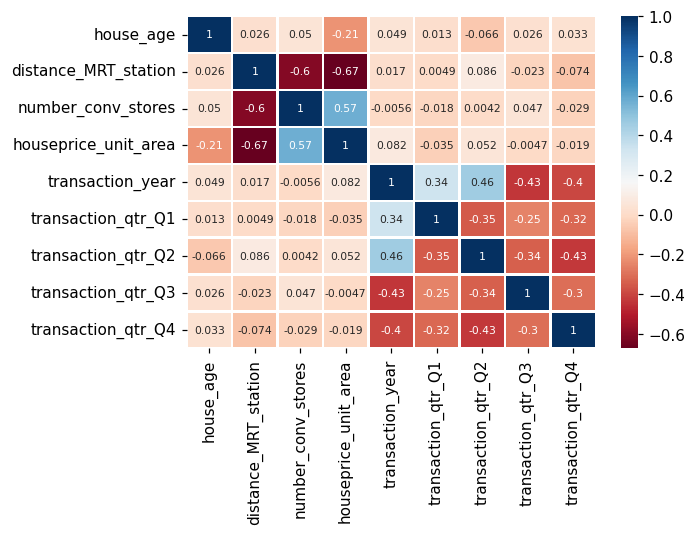

In [ ]:
#Heatmap setelah di preprocessing
plt.figure(dpi=110)
sns.heatmap(df_dummy.corr(), linewidths=1,cmap="RdBu",annot=True, annot_kws={'size':7})


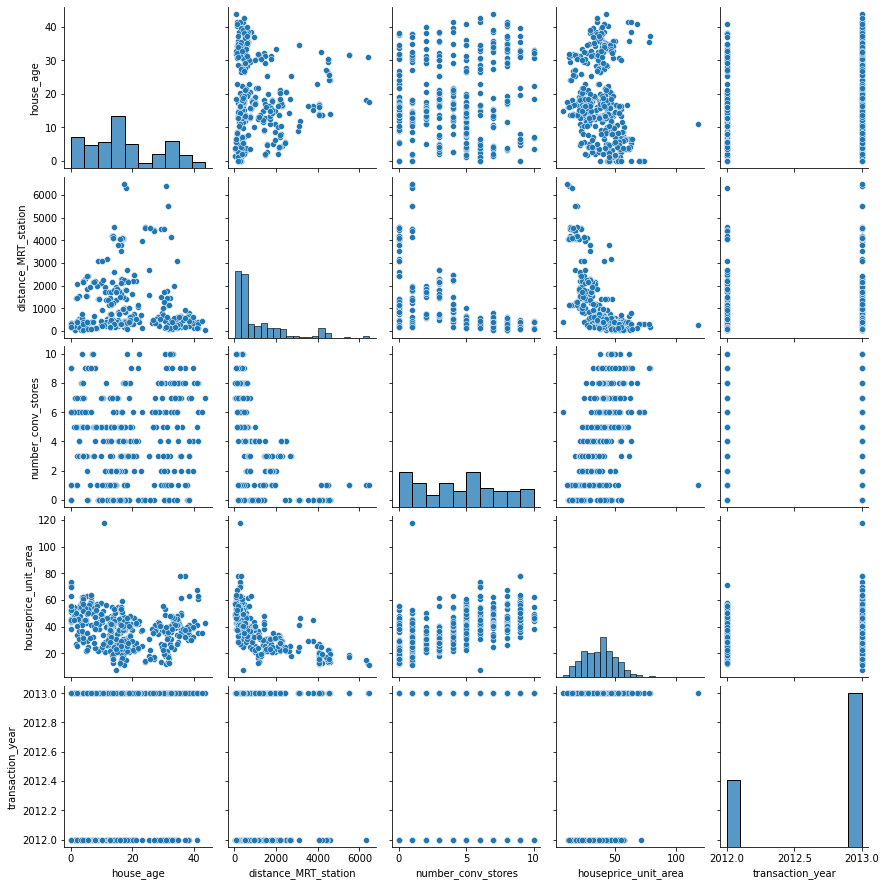

In [ ]:
# Visualisasi pairplot
sns.pairplot(df)

Dari pairplot di atas, dapat dilihat distribusi atribut tunggal dan hubungan dua atribut data.

<Figure size 576x360 with 0 Axes>

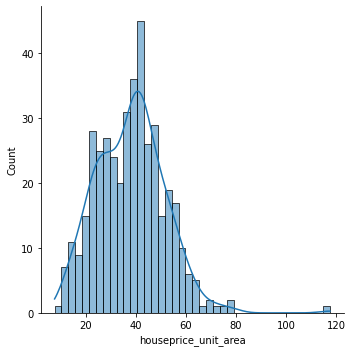

In [ ]:
# Visualisis plot distribusi dari house price of unit area
plt.figure(figsize=(8,5))
sns.displot(df['houseprice_unit_area'], bins=40, kde=True)

Dari visualisasi tersebut, dapat dilihat distribusi atau sebaran harga rumah dari unit area tersebut. (membentuk distribusi normal)

In [ ]:
# Akan diurutkan korelasi setiap variabel dengan 'houseprice_unit_area' untuk melihat faktor-faktor apa saja yang paling berkolerasi dengan harga rumah
abs(df_dummy.corr()['houseprice_unit_area']).sort_values()[::-1][:5]

houseprice_unit_area    1.000000
distance_MRT_station    0.673613
number_conv_stores      0.571005
house_age               0.210567
transaction_year        0.081545
Name: houseprice_unit_area, dtype: float64

Berdasarkan visualisasi dan analisis data setelah preprocessing tersebut, Beberapa informasi yang didapat :
- Terdapat korelasi negatif (sebesar 0.67) antara jarak ke stasiun MRT dengan harga rumah, semakin dekat jarak ke stasiun MRT, harganya semakin mahal, begitu pula sebaliknya
- Terdapat korelasi positif (sebesar 0.57) antara jumlah banyak toko kecil/mini market di sekitar rumah dengan harga rumah. Semakin banyak toko kecil/mini market di sekitar rumah, maka harga rumahnya semakin mahal, begitu pula sebaliknya.
- Terdapat korelasi negatif (sebesar 0.6) antara jumlah banyak toko kecil/mini market di sekitar rumah dengan jarak ke stasiun MRT, atau dengan kata lain semakin dekat jarak ke stasiun MRT, semakin banyak jumlah toko kecil/mini market.
- Sedangkan umur rumah, dan tahun transaksi rumah korelasinya terhadap harga rumah kecil, sehingga tidak terlalu berpengaruh pada harga rumah. Variabel tahun transaksi sendiri hampir tidak memiliki korelasi sama sekali karena pada data, tahun transaksi hanyalah tahun 2012 dan 2013 saja.
- Orang-orang cenderung untuk membeli rumah pada quarter ke-2, daripada di quarter lain dalam 1 tahun.
- Korelasi tiap-tiap variabel lain terhadap harga rumah tidaklah besar, sehingga model yang akan difitted nantinya pun tidak akan memiliki r-square yang baik.

